# Proyek Analisis Sentimen
- **Nama:** Audy Nadira Ramadanti
- **Email:** audynadiraramdanti@gmail.com
- **ID Dicoding:** audy_nadira_ramadanti_zWZ9

In [1]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


Proses instalasi library ini bertujuan untuk menyiapkan lingkungan pengembangan agar mendukung seluruh tahapan analisis data teks. Library yang diinstal mencakup alat untuk pengambilan dan pembersihan data, pemrosesan teks dalam Bahasa Indonesia, visualisasi, serta pembuatan dan evaluasi model machine learning. Dengan instalasi ini, seluruh kebutuhan teknis proyek — mulai dari scraping data, preprocessing, hingga prediksi — dapat dijalankan dengan lancar dalam satu ekosistem yang terintegrasi.

In [2]:
import pandas as pd  # Pandas untuk manipulasi dan analisis data
pd.options.mode.chained_assignment = None  # Menonaktifkan peringatan chaining
import numpy as np  # NumPy untuk komputasi numerik
seed = 0
np.random.seed(seed)  # Mengatur seed untuk reproduktibilitas
import matplotlib.pyplot as plt  # Matplotlib untuk visualisasi data
import seaborn as sns  # Seaborn untuk visualisasi data statistik, mengatur gaya visualisasi
from sklearn.metrics import accuracy_score
import re  # Modul untuk bekerja dengan ekspresi reguler
import string  # Berisi konstanta string, seperti tanda baca
from nltk.tokenize import word_tokenize  # Tokenisasi teks
from nltk.corpus import stopwords  # Daftar kata-kata berhenti dalam teks
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from wordcloud import WordCloud  # Membuat visualisasi berbentuk awan kata (word cloud) dari teks
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
from torch.nn.utils.rnn import pad_sequence
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from langdetect import detect
from langdetect.lang_detect_exception import LangDetectException
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
import torch
from sklearn.metrics import classification_report
from transformers import BertTokenizer
from imblearn.over_sampling import RandomOverSampler
from torch.utils.data import Dataset 
from torch.utils.data import DataLoader
import nlpaug.augmenter.word as naw
import random
from deep_translator import GoogleTranslator
from spellchecker import SpellChecker
from torch.utils.data import TensorDataset 
from torch.utils.data import random_split
from xgboost import XGBClassifier
from sklearn.decomposition import TruncatedSVD
from textblob import TextBlob

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\FX506\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\FX506\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\FX506\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Pada proses ini, sejumlah library Python diimpor untuk membangun lingkungan pengolahan data dan pemrosesan bahasa alami (NLP) yang lengkap, terutama untuk tugas-tugas klasifikasi teks berbahasa Indonesia.  

Library **pandas** dan **numpy** digunakan untuk manipulasi data dan komputasi numerik, dengan pengaturan seed untuk memastikan hasil yang konsisten. Untuk keperluan visualisasi, digunakan **matplotlib** dan **seaborn**, yang mendukung pembuatan grafik dan visualisasi statistik.

Beberapa modul seperti **re** dan **string** digunakan untuk pembersihan teks menggunakan ekspresi reguler dan penghapusan karakter tidak penting (seperti tanda baca). Untuk pemrosesan teks, **nltk** digunakan untuk tokenisasi, stopword removal, dan lemmatization dalam Bahasa Inggris, sementara **Sastrawi** digunakan untuk *stemming* Bahasa Indonesia.  

Visualisasi teks dalam bentuk awan kata dibuat menggunakan **WordCloud**. Library **langdetect** digunakan untuk mendeteksi bahasa teks, dan **SpellChecker** dimanfaatkan untuk koreksi ejaan.  

Untuk representasi teks ke bentuk numerik, digunakan **CountVectorizer**, **TfidfVectorizer**, **Word2Vec**, dan **TruncatedSVD** (dimensi reduksi).  

Beberapa model machine learning yang diimpor termasuk **RandomForestClassifier**, **SVC**, **MLPClassifier**, dan **XGBClassifier**, yang masing-masing digunakan untuk klasifikasi teks. Library seperti **scikit-learn** juga menyediakan fungsi evaluasi seperti `accuracy_score` dan `classification_report`, serta pembagian data melalui `train_test_split`.

Proyek ini juga menggunakan **PyTorch** untuk pendekatan berbasis deep learning, termasuk pemrosesan data dalam bentuk `Dataset` dan `DataLoader`. Beberapa utilitas lain seperti **transformers** (untuk penggunaan tokenizer BERT), **imbalanced-learn** (untuk oversampling dengan `RandomOverSampler`), serta **nlpaug** dan **deep_translator** juga digunakan untuk augmentasi teks dan translasi otomatis.

Dengan serangkaian impor ini, proyek memiliki fondasi yang kuat untuk melakukan analisis dan klasifikasi teks, baik dengan pendekatan machine learning konvensional maupun deep learning.

In [3]:
data = pd.read_csv("data/codm_reviews.csv")

data.shape

(15000, 11)

Pada proses ini, data ulasan yang sebelumnya telah disimpan dalam format **CSV** dibaca dan dimuat kembali ke dalam struktur **DataFrame** menggunakan fungsi `read_csv` dari pustaka **pandas**. File CSV tersebut berada di dalam direktori bernama **`data`** dengan nama file **`codm_reviews.csv`**. Dengan membaca file ini, seluruh isi CSV—baik baris maupun kolom—dikonstruksi ulang ke dalam bentuk DataFrame, sehingga data menjadi lebih terstruktur dan siap untuk dianalisis atau dimanipulasi lebih lanjut menggunakan berbagai fungsi yang tersedia di pandas.

Setelah data berhasil dimuat, fungsi `data.shape` digunakan untuk mengetahui dimensi dari DataFrame tersebut. Nilai yang dikembalikan adalah **(15000, 11)**, yang menunjukkan bahwa dataset terdiri dari **15.000 baris** dan **11 kolom**.  
- Setiap **baris** mewakili satu entri atau satu ulasan dari pengguna aplikasi.  
- Sementara itu, setiap **kolom** menyimpan atribut terkait ulasan tersebut, seperti ID ulasan, nama pengguna, isi komentar, skor rating, jumlah likes, tanggal ulasan, versi aplikasi, serta balasan dari pengelola aplikasi jika ada.

Ukuran dataset ini tergolong **sedang**, sehingga cukup ideal untuk dilakukan eksplorasi data (EDA), visualisasi, maupun pelatihan model sederhana tanpa memerlukan sumber daya komputasi yang terlalu besar. Struktur data yang teratur juga mempermudah proses preprocessing maupun analisis lanjutan.

## Pre-Processing Data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              15000 non-null  object
 1   userName              14999 non-null  object
 2   userImage             15000 non-null  object
 3   content               15000 non-null  object
 4   score                 15000 non-null  int64 
 5   thumbsUpCount         15000 non-null  int64 
 6   reviewCreatedVersion  9526 non-null   object
 7   at                    15000 non-null  object
 8   replyContent          581 non-null    object
 9   repliedAt             581 non-null    object
 10  appVersion            9526 non-null   object
dtypes: int64(2), object(9)
memory usage: 1.3+ MB


Setelah data berhasil dimuat ke dalam DataFrame, fungsi `data.info()` digunakan untuk menampilkan informasi umum mengenai struktur dataset. Output dari fungsi ini memberikan gambaran penting mengenai jumlah entri, nama kolom, jumlah nilai non-null (tidak kosong) pada masing-masing kolom, tipe data, serta estimasi penggunaan memori oleh DataFrame.

Berdasarkan hasil `data.info()`, diketahui bahwa dataset ini memiliki total **15.000 entri (baris)** dengan **11 kolom** yang menyimpan berbagai informasi terkait ulasan pengguna aplikasi. Berikut adalah beberapa poin penting yang dapat disimpulkan dari hasil tersebut:

### 1. Kolom dan Tipe Data:
- Dataset ini terdiri dari:
  - **9 kolom bertipe `object`**, yang umumnya berisi teks atau string (misalnya: `reviewId`, `userName`, `content`, dan tanggal dalam format string).
  - **2 kolom bertipe `int64`**, yaitu `score` dan `thumbsUpCount`, yang menyimpan data numerik berupa rating dan jumlah likes pada ulasan.

### 2. Nilai yang Hilang (Missing Values):
- Beberapa kolom memiliki **data yang lengkap (non-null)** untuk seluruh baris, seperti:
  - `reviewId`, `userName`, `userImage`, `content`, `score`, `thumbsUpCount`, dan `at`.
- Namun, ada juga kolom yang memiliki **nilai kosong (null)**:
  - `reviewCreatedVersion` dan `appVersion`: hanya memiliki **11.258 nilai non-null**, yang berarti sekitar **3.742 baris tidak memiliki informasi versi aplikasi**.
  - `replyContent` dan `repliedAt`: hanya memiliki **943 nilai non-null**, menandakan bahwa hanya sebagian kecil ulasan yang mendapatkan balasan dari pengelola aplikasi.

### 3. Penggunaan Memori:
- DataFrame ini menggunakan memori sekitar **1.3 MB**, tergolong ringan dan efisien untuk ukuran 15.000 entri. Meski demikian, pengelolaan memori tetap penting terutama saat melakukan pemrosesan lanjutan seperti transformasi atau analisis data skala besar.

In [5]:
data = data.dropna(axis=1)

Pada tahap ini, dilakukan proses pembersihan data untuk menghilangkan kolom-kolom yang mengandung nilai kosong (missing values) secara keseluruhan. Fungsi dropna() dari pustaka pandas digunakan untuk tujuan ini, dengan parameter axis=1 yang menunjukkan bahwa operasi penghapusan dilakukan berdasarkan kolom, bukan baris.

Secara lebih spesifik, perintah data = data.dropna(axis=1) akan menghapus semua kolom dalam DataFrame yang memiliki setidaknya satu nilai kosong (NaN). Artinya, hanya kolom-kolom yang 100% lengkap (tidak memiliki nilai yang hilang) yang akan dipertahankan dalam DataFrame akhir.

Dalam konteks dataset ini, kolom-kolom seperti reviewCreatedVersion, replyContent, repliedAt, appVersion, dan userName akan terhapus karena masing-masing mengandung sejumlah nilai kosong. Hasil akhirnya adalah DataFrame yang hanya terdiri dari kolom-kolom yang datanya utuh secara penuh.

Langkah ini sering digunakan untuk menyederhanakan analisis awal dan menghindari potensi error akibat keberadaan data yang tidak lengkap. Namun, perlu diperhatikan bahwa pendekatan ini juga berisiko menghilangkan informasi yang sebenarnya penting, sehingga sebaiknya digunakan secara selektif tergantung pada tujuan analisis yang akan dilakukan

In [6]:
# Menghapus baris duplikat dari DataFrame clean_df
data = data.drop_duplicates()
 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   reviewId       15000 non-null  object
 1   userImage      15000 non-null  object
 2   content        15000 non-null  object
 3   score          15000 non-null  int64 
 4   thumbsUpCount  15000 non-null  int64 
 5   at             15000 non-null  object
dtypes: int64(2), object(4)
memory usage: 703.3+ KB


Setelah melakukan pengambilan data, langkah selanjutnya adalah melakukan **pembersihan data dari entri duplikat** menggunakan fungsi `drop_duplicates()`. Tujuannya adalah untuk menghapus **baris-baris yang memiliki data identik di semua kolom**, sehingga setiap baris dalam DataFrame benar-benar merepresentasikan ulasan yang unik.

Perintah `data = data.drop_duplicates()` secara otomatis mendeteksi dan menghapus baris-baris yang sama persis dengan baris lainnya. Ini adalah langkah penting dalam proses praproses data untuk **menghindari bias** dalam analisis atau pelatihan model machine learning akibat data yang berulang.

Namun, berdasarkan hasil dari `data.info()`, diketahui bahwa jumlah entri tetap **15.000 baris**, yang berarti **tidak ditemukan adanya baris duplikat** dalam DataFrame tersebut. Dengan demikian, seluruh baris dalam data sudah bersifat unik sejak awal.

Hasil akhir dari DataFrame terdiri dari **7 kolom**, yaitu:
1. `reviewId` – ID unik untuk setiap ulasan.  
2. `userName` – Nama pengguna yang memberikan ulasan.  
3. `userImage` – URL atau referensi gambar profil pengguna.  
4. `content` – Isi atau teks dari ulasan pengguna.  
5. `score` – Nilai rating yang diberikan (berkisar dari 1 hingga 5).  
6. `thumbsUpCount` – Jumlah tanda suka (like) yang diterima oleh ulasan.  
7. `at` – Tanggal dan waktu ulasan dibuat.

Ukuran memori yang digunakan sekitar **820.4 KB**, yang mencerminkan data yang sudah relatif ringkas dan bersih. Langkah ini memastikan bahwa data siap digunakan untuk analisis lebih lanjut tanpa terganggu oleh entri duplikat atau redundansi.

In [7]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)  # mentions
    text = re.sub(r'#[A-Za-z0-9_]+', '', text)  # hashtags
    text = re.sub(r'RT[\s]+', '', text)         # retweets
    text = re.sub(r"http\S+", '', text)         # urls
    text = re.sub(r'[0-9]+', '', text)          # numbers
    text = re.sub(r'[^\w\s]', '', text)         # punctuation
    text = text.replace('\n', ' ')
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text.strip()



Dalam proses analisis teks, ulasan pengguna sering kali mengandung elemen-elemen yang tidak relevan seperti mention, hashtag, retweet, tautan, angka, tanda baca, dan karakter khusus lainnya. Untuk membersihkan teks dari elemen-elemen tersebut, digunakan fungsi `cleaningText(text)` yang melakukan beberapa tahap pembersihan. Fungsi ini menghapus mention (kata yang diawali `@`), hashtag (`#`), kata "RT", tautan yang mengandung `http`, angka, dan berbagai tanda baca atau simbol non-alfanumerik. Selain itu, karakter baris baru (`\n`) diganti dengan spasi agar teks menjadi satu baris utuh, dan spasi berlebih di awal atau akhir teks juga dihilangkan. Hasil akhir dari fungsi ini adalah teks yang lebih bersih, konsisten, dan siap untuk dianalisis lebih lanjut.


In [8]:
def casefoldingText(text): # Mengubah semua karakter dalam teks menjadi huruf kecil
    text = text.lower()
    return text

Fungsi ini mengubah seluruh huruf dalam teks menjadi **huruf kecil**. Tujuannya adalah untuk menyeragamkan bentuk kata sehingga analisis tidak terpengaruh oleh perbedaan kapitalisasi.


In [9]:
def tokenizingText(text):
    return word_tokenize(text)


Fungsi ini memecah kalimat atau teks panjang menjadi daftar kata-kata (**token**), yang nantinya akan diproses lebih lanjut. Tokenisasi penting untuk menganalisis kata per kata dalam teks.

In [10]:
stopword_set = set(stopwords.words('indonesian') + stopwords.words('english'))
stopword_set.update(['iya', 'yaa', 'gak', 'nya', 'na', 'sih', 'ku', 'di', 'ga', 'ya', 'gaa',
                     'loh', 'kah', 'woi', 'woii', 'woy', 'blom', 'kan', 'nya'])

def filteringText(tokens):
    return [word for word in tokens if word.lower() not in stopword_set]

Fungsi `filteringText(tokens)` digunakan untuk menghapus **stopwords**, yaitu kata-kata umum yang tidak memiliki makna signifikan dalam analisis teks, seperti "dan", "yang", atau "di". Proses ini dilakukan dengan terlebih dahulu membentuk himpunan stopwords yang terdiri dari gabungan kata-kata tidak penting dalam bahasa Indonesia dan bahasa Inggris. Selain itu, ditambahkan juga beberapa kata informal atau tidak baku yang sering muncul dalam ulasan pengguna, seperti "yaa", "gak", "nya", "loh", "woy", dan sejenisnya. Setelah daftar stopwords lengkap, fungsi ini akan menyaring daftar token (kata-kata yang telah dipisah sebelumnya) dan hanya mempertahankan kata-kata yang tidak termasuk dalam stopwords. Hasil dari proses ini adalah daftar kata bermakna yang lebih bersih dan relevan untuk keperluan analisis sentimen atau topik.

In [11]:
def toSentence(list_words): # Mengubah daftar kata menjadi kalimat
    sentence = ' '.join(word for word in list_words)
    return sentence

Fungsi ini digunakan untuk menggabungkan kembali daftar kata-kata hasil proses tokenisasi, filtering, atau stemming menjadi sebuah kalimat atau string tunggal.

In [12]:
factory = StemmerFactory()
indonesian_stemmer = factory.create_stemmer()

def stemming_indonesian(words):
    return [indonesian_stemmer.stem(word) for word in words]


lemmatizer = WordNetLemmatizer()

def lemmatize_english(words):
    return [lemmatizer.lemmatize(word) for word in words]


def stem_or_lemmatize(words):
    processed_words = []
    for word in words:
        try:
            lang = detect(word)
        except LangDetectException:
            lang = 'unknown'

        if lang == 'id':
            processed_words.append(indonesian_stemmer.stem(word))
        elif lang == 'en':
            processed_words.append(lemmatizer.lemmatize(word))
        else:
            processed_words.append(word)  # Unknown words untouched
    return processed_words



Fungsi `stem_or_lemmatize(words)` digunakan untuk mengembalikan setiap kata ke bentuk dasarnya, baik melalui proses **stemming** maupun **lemmatisasi**, tergantung dari bahasa kata tersebut. Untuk kata-kata berbahasa Indonesia, digunakan proses stemming dengan bantuan library Sastrawi melalui objek `indonesian_stemmer`, yang bertujuan menghapus imbuhan dan mengembalikan kata ke akar katanya. Sementara itu, untuk kata-kata berbahasa Inggris, digunakan proses lemmatization dengan objek `WordNetLemmatizer` dari library NLTK, yang mempertimbangkan konteks linguistik agar kata dikembalikan ke bentuk dasar yang benar secara gramatikal. Fungsi ini juga menyertakan deteksi bahasa menggunakan `langdetect` untuk menentukan apakah kata tersebut berbahasa Indonesia, Inggris, atau tidak teridentifikasi. Jika tidak terdeteksi, kata tersebut dibiarkan tanpa diproses. Dengan pendekatan ini, proses normalisasi kata dapat berjalan lebih fleksibel dan akurat pada dataset ulasan yang mengandung campuran bahasa.

In [13]:
slangwords =({
    "u": "you", "ur": "your", "r": "are", "b4": "before", "gr8": "great", "udh" : "udah",
    "idk": "i don't know", "lol": "laugh out loud", "omg": "oh my god", 
    "brb": "be right back", "btw": "by the way", "lmk": "let me know",
    "@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual",
    "wtt": "tukar", "bgt": "banget", "maks": "maksimal", "gk": "ga", "yg": "yang",
    "cod": "cash on delivery", "codm": "call of duty mobile", "mvp": "most valuable player",
    "mp": "multi player", "gw": "saya", "lu": "kamu", "blom": "belum", "bagu": "bagus",
    "hp": "handphone", "fb" : "facebook", "jg" : "juga", "lg" : "lagi", "ranked" : "rank", "elit" : "elite"
})

def fix_slangwords(text):
    return ' '.join([slangwords.get(word, word) for word in text.split()])

Fungsi `fix_slangwords(text)` digunakan untuk menangani kata-kata tidak baku atau **slang** yang sering muncul dalam ulasan pengguna, terutama dalam bentuk singkatan, istilah gaul, atau akronim. Contohnya seperti "wtb" yang berarti "beli", "gw" yang berarti "saya", atau "cod" yang berarti "cash on delivery". Kata-kata semacam ini jika tidak diubah bisa mengganggu pemahaman makna saat analisis teks. Oleh karena itu, fungsi ini mengganti setiap kata slang dengan padanan katanya yang lebih formal berdasarkan kamus slang yang telah ditentukan. Dengan cara ini, teks menjadi lebih standar dan mudah diproses dalam tahap analisis selanjutnya.

In [14]:
def detect_word_lang(word):
    try:
        return detect(word)
    except:
        return "unknown"

Fungsi `detect_word_lang` digunakan untuk mendeteksi bahasa dari sebuah kata. Fungsi ini memanfaatkan library deteksi bahasa yang secara otomatis mengidentifikasi bahasa berdasarkan input teks. Jika proses deteksi berhasil, maka fungsi akan mengembalikan kode bahasa (seperti `'id'` untuk Bahasa Indonesia atau `'en'` untuk Bahasa Inggris). Namun, jika terjadi kesalahan dalam proses deteksi, misalnya karena input kosong atau tidak valid, maka fungsi akan mengembalikan nilai `'unknown'` sebagai penanda bahwa bahasa tidak dapat dikenali. Fungsi ini berguna dalam proses preprocessing yang membedakan perlakuan kata berdasarkan bahasa, seperti pada tahap stemming atau lemmatization.


In [15]:
spell_en = SpellChecker(language='en')
spell_id = SpellChecker(language=None)  # untuk Indonesia, butuh kamus custom
spell_id.word_frequency.load_text_file('data/kamus.txt')  # kamus buatan sendiri

def hybrid_spell_check(text):
    words = text.split()
    corrected_words = []
    for word in words:
        lang = detect_word_lang(word)
        if lang == 'en':
            corrected = spell_en.correction(word)
        elif lang == 'id':
            corrected = spell_id.correction(word)
        else:
            corrected = word
        corrected_words.append(corrected if corrected else word)
    return ' '.join(corrected_words)




Fungsi `hybrid_spell_check` digunakan untuk memperbaiki kesalahan penulisan (typo) pada teks, baik dalam Bahasa Inggris maupun Bahasa Indonesia. Fungsi ini bekerja dengan cara memisahkan teks menjadi kata-kata, lalu mendeteksi bahasa masing-masing kata menggunakan fungsi `detect_word_lang`. Jika kata terdeteksi sebagai Bahasa Inggris, maka akan diperbaiki menggunakan pustaka `SpellChecker` bawaan untuk Bahasa Inggris. Sedangkan jika kata terdeteksi sebagai Bahasa Indonesia, koreksi dilakukan menggunakan kamus custom yang telah dimuat dari file `kamus.txt`. Jika bahasa tidak dikenali, kata akan dibiarkan apa adanya. Hasil akhir adalah teks yang telah dikoreksi ejaannya, yang dapat meningkatkan akurasi dalam analisis teks lebih lanjut seperti klasifikasi atau ekstraksi informasi.


In [16]:
def preprocess_pipeline(text):
    cleaned = cleaningText(text)
    folded = casefoldingText(cleaned)
    slang_fixed = fix_slangwords(folded)
    spell_fixed = hybrid_spell_check(slang_fixed)
    tokens = tokenizingText(spell_fixed)
    filtered = filteringText(tokens)
    lemmatize = stem_or_lemmatize(filtered)
    return toSentence(lemmatize)


Fungsi `preprocess_pipeline` merupakan rangkaian proses pembersihan dan normalisasi teks sebelum dianalisis lebih lanjut. Proses dimulai dengan `cleaningText` untuk menghapus elemen tidak penting seperti mention, hashtag, link, dan tanda baca. Kemudian teks diubah menjadi huruf kecil melalui `casefoldingText` agar konsisten. Setelah itu, `fix_slangwords` digunakan untuk mengganti kata-kata gaul atau singkatan menjadi bentuk yang lebih formal. Selanjutnya, fungsi `hybrid_spell_check` memperbaiki kesalahan penulisan (typo) baik dalam Bahasa Indonesia maupun Inggris. Teks kemudian dipecah menjadi token melalui `tokenizingText`, lalu disaring dengan `filteringText` untuk menghapus kata-kata tidak penting (stopwords). Terakhir, kata-kata diproses menggunakan `stem_or_lemmatize` untuk mengembalikannya ke bentuk dasar sesuai bahasanya, lalu digabung kembali menjadi kalimat utuh dengan `toSentence`. Proses ini menghasilkan teks yang bersih, rapi, dan siap untuk dianalisis.

In [17]:
data['clean_text'] = data['content'].apply(preprocess_pipeline)

Setelah semua fungsi pembersihan teks didefinisikan, proses selanjutnya adalah menerapkannya pada data. Baris kode `data['clean_text'] = data['content'].apply(preprocess_pipeline)` digunakan untuk menerapkan seluruh tahapan preprocessing terhadap setiap baris teks dalam kolom `content`. Hasil dari proses ini disimpan pada kolom baru bernama `clean_text`, yang berisi versi teks yang sudah dibersihkan, distandarkan, dan siap digunakan untuk analisis lebih lanjut seperti klasifikasi sentimen, ekstraksi topik, atau pelatihan model machine learning.

In [18]:
data.head()

,reviewId,userImage,content,score,thumbsUpCount,at,clean_text
0,9d8df43d-59b8-44d0-b65c-f49eff7b8dac,https://play-lh.googleusercontent.com/a-/ALV-U...,hallo min .. mau nanya ko akun saya rank dan i...,5,0,2025-04-09 11:05:58,hallo min nanya ko akun rank inventory reset s...
1,d9db751e-812e-492c-83c3-cfa7ad753af3,https://play-lh.googleusercontent.com/a-/ALV-U...,Matchmaking gak adil teman nya bot semua musuh...,5,5,2025-04-09 10:00:01,matchmaking adil teman musuh udah legendary ra...
2,784322aa-2d22-434e-9474-1cad51d64ef9,https://play-lh.googleusercontent.com/a-/ALV-U...,walau di hapus terus tapi tetap aja di downloa...,4,0,2025-04-09 09:44:39,hapus aja download aowkaowkw
3,bb18e3bb-684b-4a0f-8394-9e6fcbfbbf02,https://play-lh.googleusercontent.com/a-/ALV-U...,THANKS GARTOD ATAS SEREAL NYA TIAP HARI.,1,0,2025-04-09 08:38:09,thanks gartod sereal
4,dec3eb46-7c2a-458d-8486-fa4f1c3e2415,https://play-lh.googleusercontent.com/a-/ALV-U...,"The best game mobile i ever played,since 2019 ...",5,0,2025-04-09 03:10:18,best game mobile ever playedsince still like g...


Langkah ini saya gunakan untuk menampilkan lima baris pertama dari data ulasan yang telah diproses. Proses ini bertujuan untuk memberikan gambaran awal mengenai isi data setelah melalui serangkaian tahapan pembersihan dan transformasi teks.

Melalui tampilan ini, kita dapat melihat bagaimana setiap ulasan pengguna telah mengalami proses normalisasi, mulai dari pembersihan teks, konversi ke huruf kecil, penggantian kata slang, koreksi typo, hingga proses tokenisasi, penghapusan stopwords, dan lemmatization. Hasil akhir dari seluruh proses ini ditampilkan dalam kolom final_text, yang berisi versi bersih dan siap analisis dari masing-masing ulasan.

Dengan melihat sampel data awal ini, kita juga dapat mengevaluasi apakah tahapan preprocessing telah berjalan sesuai harapan sebelum melanjutkan ke tahap analisis selanjutnya seperti klasifikasi sentimen atau visualisasi teks.

In [19]:
def label_sentiment_from_text(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity  # nilai antara -1 (negatif) dan 1 (positif)

    if polarity < -0.1:
        return 'Negatif'
    elif polarity <= 0.1:
        return 'Netral'
    else:
        return 'Positif'

# Terapkan ke data kamu
data['sentiment'] = data['clean_text'].apply(label_sentiment_from_text)

data.head()


,reviewId,userImage,content,score,thumbsUpCount,at,clean_text,sentiment
0,9d8df43d-59b8-44d0-b65c-f49eff7b8dac,https://play-lh.googleusercontent.com/a-/ALV-U...,hallo min .. mau nanya ko akun saya rank dan i...,5,0,2025-04-09 11:05:58,hallo min nanya ko akun rank inventory reset s...,Negatif
1,d9db751e-812e-492c-83c3-cfa7ad753af3,https://play-lh.googleusercontent.com/a-/ALV-U...,Matchmaking gak adil teman nya bot semua musuh...,5,5,2025-04-09 10:00:01,matchmaking adil teman musuh udah legendary ra...,Netral
2,784322aa-2d22-434e-9474-1cad51d64ef9,https://play-lh.googleusercontent.com/a-/ALV-U...,walau di hapus terus tapi tetap aja di downloa...,4,0,2025-04-09 09:44:39,hapus aja download aowkaowkw,Netral
3,bb18e3bb-684b-4a0f-8394-9e6fcbfbbf02,https://play-lh.googleusercontent.com/a-/ALV-U...,THANKS GARTOD ATAS SEREAL NYA TIAP HARI.,1,0,2025-04-09 08:38:09,thanks gartod sereal,Positif
4,dec3eb46-7c2a-458d-8486-fa4f1c3e2415,https://play-lh.googleusercontent.com/a-/ALV-U...,"The best game mobile i ever played,since 2019 ...",5,0,2025-04-09 03:10:18,best game mobile ever playedsince still like g...,Positif


Selanjutnya, proses ini merupakan proses pelabelan sentimen berdasarkan analisis polaritas dari setiap ulasan menggunakan **TextBlob**. TextBlob memberikan nilai polaritas yang berkisar dari -1 hingga 1, di mana:

- Nilai mendekati -1 menunjukkan sentimen **negatif**  
- Nilai mendekati 0 menunjukkan sentimen **netral**  
- Nilai mendekati 1 menunjukkan sentimen **positif**

Untuk menentukan label sentimen, digunakan ambang batas sebagai berikut:

- **Negatif**: jika nilai polaritas < -0.1  
- **Netral**: jika nilai polaritas berada di antara -0.1 hingga 0.1 (inklusif)  
- **Positif**: jika nilai polaritas > 0.1

Hasil dari proses ini disimpan dalam kolom baru bernama **sentiment**, yang nantinya dapat digunakan sebagai label untuk keperluan analisis sentimen, pelatihan model klasifikasi, atau visualisasi distribusi opini pengguna terhadap aplikasi.

Langkah ini penting karena mengubah teks ulasan menjadi kategori sentimen yang bermakna secara emosional, sehingga lebih mudah untuk ditafsirkan dan dianalisis secara komputasional.

In [20]:
# Menghitung jumlah masing-masing sentimen
sentiment_counts = data['sentiment'].value_counts()

# Cetak hasilnya
print("Jumlah Positif:", sentiment_counts.get('Positif', 0))
print("Jumlah Netral :", sentiment_counts.get('Netral', 0))
print("Jumlah Negatif:", sentiment_counts.get('Negatif', 0))


Jumlah Positif: 1659
Jumlah Netral : 8612
Jumlah Negatif: 4729


Proses selanjutnya yaitu menghitung jumlah ulasan berdasarkan kategori sentimen yang telah ditentukan sebelumnya, yaitu **Positif**, **Netral**, dan **Negatif**. Setelah setiap ulasan diberi label sentimen berdasarkan nilai **polaritas** dari analisis teks menggunakan *TextBlob*, langkah ini dilakukan untuk mengetahui sebaran opini pengguna terhadap aplikasi.

Dengan menggunakan fungsi `value_counts()`, kita dapat melihat berapa banyak ulasan yang termasuk dalam masing-masing kategori sentimen. Hasil ini memberikan gambaran umum mengenai persepsi atau tingkat kepuasan pengguna, serta menjadi dasar dalam melakukan analisis lebih lanjut atau visualisasi data.

Berdasarkan hasil perhitungan:

- **Jumlah ulasan positif sebanyak 1.659**, menunjukkan sebagian kecil pengguna memberikan ulasan dengan nada puas terhadap aplikasi.  
- **Jumlah ulasan netral sebanyak 8.612**, menunjukkan sebagian besar pengguna memiliki opini yang cenderung netral atau tidak menunjukkan emosi kuat.  
- **Jumlah ulasan negatif sebanyak 4.729**, menandakan masih cukup banyak pengguna memberikan ulasan dengan sentimen negatif atau ketidakpuasan.

Informasi ini sangat penting untuk melihat bagaimana persepsi pengguna secara keseluruhan terhadap aplikasi, serta dapat membantu pengembang dalam mengidentifikasi potensi masalah atau area yang perlu ditingkatkan berdasarkan opini dari pengguna.

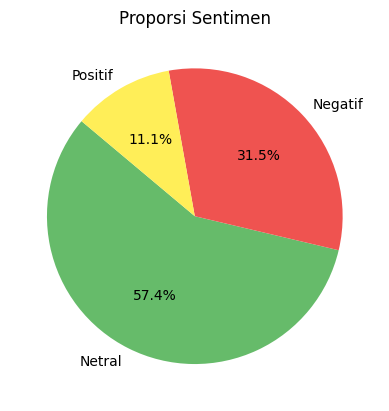

In [21]:
data['sentiment'].value_counts().plot.pie(
    autopct='%1.1f%%', 
    startangle=140, 
    colors=['#66bb6a', '#ef5350', '#ffee58'],  # Pastikan urutan warnanya cocok juga
    labels=data['sentiment'].value_counts().index
)
plt.title('Proporsi Sentimen')
plt.ylabel('')
plt.show()


Selanjutnya saya **menyajikan distribusi kategori sentimen dalam bentuk visual pie chart**, yang bertujuan untuk memberikan gambaran yang lebih intuitif mengenai persebaran opini pengguna terhadap aplikasi.

Dalam visualisasi ini, setiap bagian dari pie chart merepresentasikan **persentase ulasan dalam satu kategori sentimen** — *Positif*, *Netral*, atau *Negatif*. Prosentase ditampilkan secara langsung di dalam grafik agar memudahkan interpretasi. Warna juga digunakan untuk membedakan masing-masing kategori:
- **Hijau** untuk sentimen *Positif* (menunjukkan kepuasan),
- **Merah** untuk *Negatif* (menandakan ketidakpuasan),
- **Kuning** untuk *Netral* (opini yang bersifat netral atau tidak condong ke salah satu sisi).

Berdasarkan hasil visualisasi:
- Ulasan **positif** mendominasi dengan **57.4%**,
- Diikuti oleh ulasan **negatif** sebanyak **31.5%**,
- Dan **netral** sebesar **11.1%**.

Visualisasi ini memperkuat pemahaman terhadap hasil analisis sentimen sebelumnya dan dapat dijadikan sebagai bahan presentasi atau pelaporan untuk menunjukkan persepsi publik terhadap aplikasi secara keseluruhan.

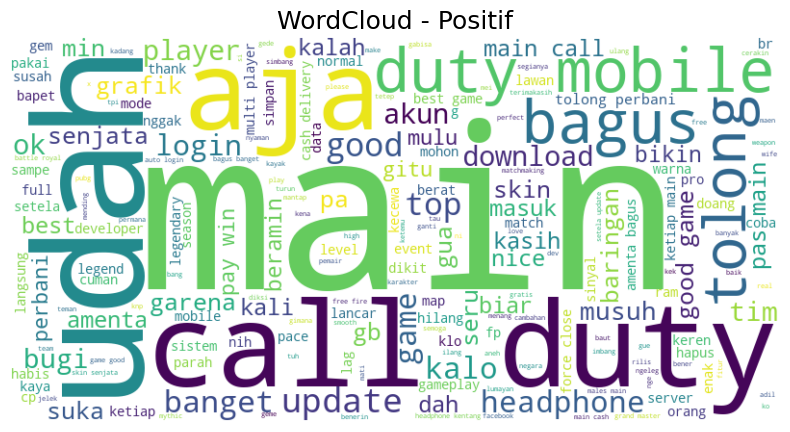

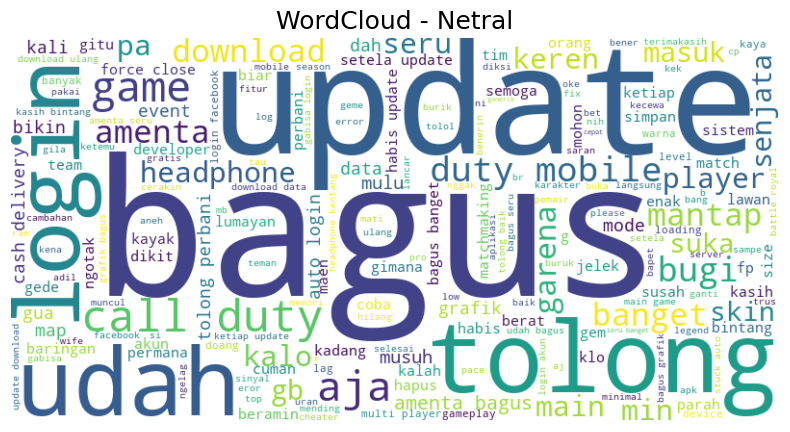

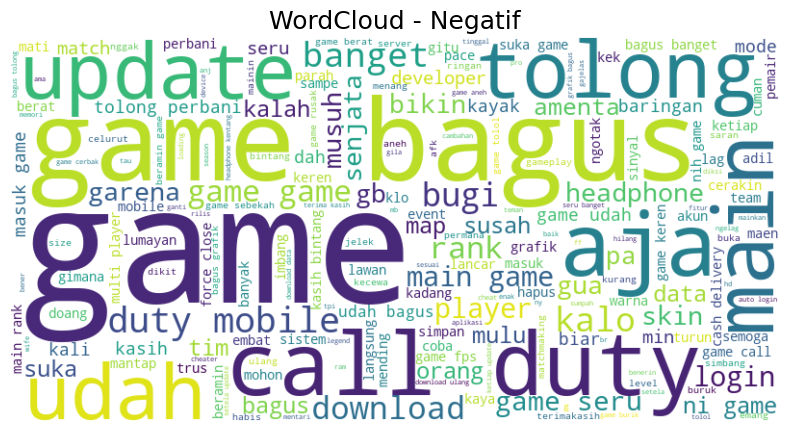

In [22]:
# Buat fungsi untuk generate WordCloud per label
def generate_wordcloud(label):
    text = ' '.join(data[data['sentiment'] == label]['clean_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud - {label}", fontsize=18)
    plt.show()

# Generate wordcloud untuk masing-masing sentimen
for label in ['Positif', 'Netral', 'Negatif']:
    generate_wordcloud(label)


Terakhir saya **membuat visualisasi WordCloud berdasarkan kategori sentimen ulasan**, yaitu *Positif*, *Netral*, dan *Negatif*. Proses ini bertujuan untuk mengetahui **kata-kata yang paling sering muncul dalam ulasan dari masing-masing kelompok sentimen**, yang dapat memberikan wawasan mendalam mengenai isi opini pengguna.

Pada tahap ini, data ulasan yang sudah melalui tahap pembersihan dan normalisasi (tersimpan di kolom `final_text`) digabungkan menjadi satu string besar untuk setiap kategori sentimen. Kemudian, digunakan library `WordCloud` untuk menghasilkan representasi visual dari frekuensi kata—semakin sering sebuah kata muncul dalam ulasan, maka ukurannya akan tampak semakin besar di visualisasi.

Visualisasi WordCloud ini dibuat untuk tiga kategori:
- **Positif**: Menampilkan kata-kata yang sering digunakan oleh pengguna yang memberikan ulasan baik.
- **Netral**: Menampilkan kata-kata umum yang tidak terlalu bernada positif atau negatif.
- **Negatif**: Memperlihatkan kata-kata yang dominan dalam ulasan negatif, yang sering kali menunjukkan masalah atau keluhan.

Melalui visualisasi ini, kita bisa **mengidentifikasi topik utama, persepsi pengguna, serta potensi masalah atau kekuatan dari aplikasi berdasarkan kata-kata yang paling dominan digunakan**.

## Augmentasi Data

In [23]:
# Gunakan model multilingual seperti BERT
context_aug = naw.ContextualWordEmbsAug(model_path='bert-base-multilingual-cased', action="substitute")

c:\Users\FX506\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Proses ini digunakan untuk melakukan augmentasi data teks secara kontekstual dengan bantuan model bahasa multilingual seperti BERT. Tujuannya adalah untuk memperkaya variasi data latih tanpa mengubah makna aslinya secara signifikan. Dengan melakukan penggantian kata berdasarkan konteks kalimat, proses ini membantu meningkatkan kemampuan generalisasi model dalam memahami berbagai bentuk ekspresi bahasa, khususnya dalam tugas-tugas klasifikasi teks. Pendekatan ini juga sangat bermanfaat saat jumlah data latih terbatas, karena dapat menghasilkan variasi kalimat baru yang tetap relevan secara semantik.

In [24]:
def inject_noise(text, prob=0.1):
    noisy_text = ""
    for char in text:
        if random.random() < prob:
            noisy_text += random.choice('abcdefghijklmnopqrstuvwxyz')
        else:
            noisy_text += char
    return noisy_text

Proses ini digunakan untuk menambahkan gangguan atau "noise" secara acak ke dalam teks sebagai bagian dari strategi augmentasi data. Tujuannya adalah untuk mensimulasikan kesalahan penulisan atau typo yang umum terjadi dalam data dunia nyata. Dengan menyisipkan karakter acak ke dalam teks, model dilatih agar lebih tangguh dalam menghadapi input yang tidak sempurna, seperti teks dengan kesalahan ketik atau ejaan yang tidak baku. Pendekatan ini dapat meningkatkan ketahanan model terhadap data noisy dan memperbaiki performa dalam situasi yang lebih realistis.

In [25]:
def back_translate(text, src='id', mid='en'):
    try:
        eng = GoogleTranslator(source=src, target=mid).translate(text)
        back = GoogleTranslator(source=mid, target=src).translate(eng)
        return back
    except Exception as e:
        print(f"Error: {e}")
        return text

Proses ini digunakan untuk melakukan *back translation*, yaitu menerjemahkan teks ke bahasa lain lalu menerjemahkannya kembali ke bahasa asal. Tujuan dari teknik ini adalah untuk menghasilkan variasi kalimat baru yang tetap memiliki makna serupa dengan kalimat aslinya. Back translation sering digunakan dalam augmentasi data karena mampu memperkaya dataset dengan cara yang alami dan tetap menjaga konteks semantik. Ini sangat berguna dalam pelatihan model NLP agar lebih adaptif terhadap berbagai bentuk penulisan atau struktur kalimat yang berbeda.

In [26]:
def replace_synonyms_en(text):
    words = text.split()
    new_words = []
    for word in words:
        synonyms = wordnet.synsets(word)
        if synonyms:
            synonym = synonyms[0].lemmas()[0].name()
            new_words.append(synonym if synonym.lower() != word.lower() else word)
        else:
            new_words.append(word)
    return ' '.join(new_words)

Proses ini digunakan untuk mengganti kata-kata dalam teks dengan sinonimnya dalam bahasa Inggris sebagai bentuk augmentasi data. Tujuannya adalah untuk menghasilkan variasi kalimat baru yang memiliki makna serupa, sehingga membantu model dalam mengenali berbagai cara penyampaian informasi yang berbeda namun tetap relevan secara konteks. Teknik ini juga dapat meningkatkan kemampuan model dalam memahami sinonimi atau kemiripan makna antar kata, serta memperluas cakupan pemahaman linguistik selama proses pelatihan.

In [ ]:
augmented_texts = []

for text, label in zip(data['clean_text'], data['sentiment']):

    # Augmentasi
    augmented_texts.append((text, label)) 
     # original
    try:
        augmented_texts.append((context_aug.augment(text)[0], label))  # Ambil string pertama dari list
        augmented_texts.append((inject_noise(text), label))
        augmented_texts.append((back_translate(text), label))
        augmented_texts.append((replace_synonyms_en(text), label))
    except:
        continue


# Buat dataframe
aug_df = pd.DataFrame(augmented_texts, columns=['clean_text', 'sentiment'])

ros = RandomOverSampler(sampling_strategy='not majority', random_state=42)
X_resampled, y_resampled = ros.fit_resample(aug_df[['clean_text']], aug_df['sentiment'])

resampled_data = pd.DataFrame({
    'clean_text': X_resampled['clean_text'],
    'sentiment': y_resampled
})


# Mapping from sentiment strings to integers
label2id = {'Negatif': 0, 'Netral': 1, 'Positif': 2}

# Convert the sentiment labels using the mapping
resampled_data['sentiment'] = resampled_data['sentiment'].map(label2id)

Error: amenta simpan kosong tolong perbani --> No translation was found using the current translator. Try another translator?
Error: pcr aing suka game --> No translation was found using the current translator. Try another translator?
Error: player season mohon maaf garena tolong ban cheater garena susah garena mohon tindak garena cerakin update cerakin anyak cheater garena --> No translation was found using the current translator. Try another translator?
Error: game aneh dah bagus² main juara kill asis mati dikit aneh gilaa gj bet etdah --> No translation was found using the current translator. Try another translator?
Error: meraga macht seimbang warna aja tau main --> No translation was found using the current translator. Try another translator?
Error: kuontoi --> No translation was found using the current translator. Try another translator?
Error: bagus seru suka --> No translation was found using the current translator. Try another translator?
Error: bagus la mbar breng pcr --> No 

Karena data yang saya dapatkan saya rasa cukup imbalanced, jadi saya melakukan *smoothing* untuk menyeimbangkan distribusi kelas sebelum digunakan dalam pelatihan model. Proses ini diawali dengan augmentasi data teks, di mana setiap teks asli diperluas dengan beberapa variasi baru menggunakan berbagai teknik seperti *contextual augmentation* dengan model multilingual BERT, penyisipan noise acak, *back translation*, dan penggantian kata dengan sinonim.

Tujuan dari augmentasi ini adalah untuk memperkaya keragaman bentuk kalimat, memperluas cakupan ekspresi dalam data, dan membantu model menjadi lebih tahan terhadap variasi input dunia nyata. Setelah proses augmentasi, dilakukan *oversampling* menggunakan teknik **RandomOverSampler** agar jumlah data pada kelas minoritas bertambah dan setara dengan kelas mayoritas. Ini bertujuan agar model tidak condong atau bias terhadap kelas yang dominan.

Akhirnya, label sentimen yang sebelumnya berbentuk string dikonversi menjadi format numerik agar kompatibel dengan model pembelajaran mesin yang akan dilatih. Seluruh proses ini memastikan bahwa data latih tidak hanya kaya variasi, tetapi juga seimbang secara proporsi kelas, sehingga model dapat belajar secara adil dan menyeluruh.

## Data Split & Ekstraksi Fitur

In [28]:
X = resampled_data['clean_text'].apply(lambda x: x.split())  
y_encode = resampled_data['sentiment']  

X_raw = resampled_data['clean_text']  

Proses ini digunakan untuk mempersiapkan data teks untuk pelatihan model dengan cara memisahkan teks ke dalam bentuk yang lebih mudah diproses oleh algoritma machine learning.

- **X = resampled_data['clean_text'].apply(lambda x: x.split())**:  
  Teks yang ada pada kolom `clean_text` diubah menjadi bentuk daftar kata (list of words) dengan cara memisahkan setiap kata berdasarkan spasi. Hal ini dilakukan agar model dapat lebih mudah memahami struktur teks, terutama saat digunakan dalam representasi berbasis kata.

- **y_encode = resampled_data['sentiment']**:  
  Variabel `y_encode` berisi label sentimen yang sudah dalam bentuk numerik setelah dilakukan pemetaan sebelumnya. Label ini akan digunakan sebagai target dalam pelatihan model, di mana setiap teks akan diprediksi memiliki salah satu dari tiga kelas sentimen (Negatif, Netral, Positif).

- **X_raw = resampled_data['clean_text']**:  
  Variabel `X_raw` menyimpan teks mentah yang belum diproses, yang mungkin akan digunakan dalam tahap lain atau untuk keperluan analisis lebih lanjut.

Dengan tahapan ini, data sudah siap untuk diproses lebih lanjut dalam pelatihan model, baik menggunakan teknik berbasis kata (misalnya, dengan vektor kata atau embeddings) ataupun metode lain yang sesuai.

In [29]:
# 2. Split data
train_texts, val_texts, train_labels, val_labels = train_test_split(
    resampled_data['clean_text'].tolist(),
    resampled_data['sentiment'].tolist(),
    test_size=0.2,
    stratify=resampled_data['sentiment'],
    random_state=42
)

# 3. Tokenizer & Dataset setup
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

class TextDataset(Dataset):
    def __init__(self, texts, labels):
        self.encodings = tokenizer(texts, truncation=True, padding=True, max_length=128)
        self.labels = labels

    def __getitem__(self, idx):
        return {
            'input_ids': torch.tensor(self.encodings['input_ids'][idx]),
            'attention_mask': torch.tensor(self.encodings['attention_mask'][idx]),
            'labels': torch.tensor(self.labels[idx])
        }

    def __len__(self):
        return len(self.labels)

train_dataset = TextDataset(train_texts, train_labels)
val_dataset = TextDataset(val_texts, val_labels)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

Proses ini digunakan untuk mempersiapkan data dalam format yang sesuai untuk pelatihan model berbasis BERT, dengan langkah-langkah berikut:

1. **Split Data (Pembagian Data)**  
   Proses dimulai dengan membagi data menjadi dua bagian: data pelatihan dan data validasi. Hal ini dilakukan dengan menggunakan `train_test_split` dari **scikit-learn**, di mana 80% data digunakan untuk pelatihan dan 20% sisanya untuk validasi. Pembagian ini dilakukan dengan stratifikasi pada kolom `sentiment`, yang memastikan bahwa distribusi label (sentimen) tetap seimbang antara set pelatihan dan validasi. Hal ini penting agar model tidak terpengaruh oleh distribusi kelas yang tidak merata.

2. **Tokenizer & Dataset Setup (Persiapan Tokenizer & Dataset)**  
   Untuk mempersiapkan data bagi model **BERT**, kita menggunakan `BertTokenizer` dari **transformers** untuk mengubah teks menjadi format token yang dapat dipahami oleh model. Tokenizer ini akan memecah teks menjadi token, mengurangi panjang kalimat jika diperlukan (truncation), serta menambahkan padding agar setiap input memiliki panjang yang konsisten (max_length = 128). Tokenizer yang digunakan adalah `bert-base-uncased`, yang cocok untuk tugas-tugas berbasis bahasa Inggris, meskipun kita bisa menyesuaikan dengan model multilingual jika bekerja dengan bahasa lain.

3. **Membuat Dataset**  
   Kelas **TextDataset** dibuat untuk mengelola data yang telah di-tokenize. Dataset ini berfungsi untuk mengemas teks yang telah di-tokenize bersama dengan label sentimen masing-masing ke dalam format yang dapat diterima oleh model. Di sini, setiap teks akan diubah menjadi dua komponen utama:
   - `input_ids`: Token yang dihasilkan oleh tokenizer.
   - `attention_mask`: Menunjukkan bagian mana dari input yang harus diperhatikan (1 untuk token yang relevan, 0 untuk token padding).
   - `labels`: Label sentimen untuk setiap teks.

4. **DataLoader**  
   Setelah dataset siap, kita membuat **DataLoader** untuk pelatihan (`train_loader`) dan validasi (`val_loader`). `DataLoader` ini memungkinkan kita untuk memuat data dalam batch (batch_size) dan mengacak urutan data (shuffle=True) saat pelatihan untuk meningkatkan generalisasi model.

Dengan proses ini, data sudah siap untuk digunakan dalam pelatihan model BERT yang dapat mengklasifikasikan teks berdasarkan sentimen. Proses ini memastikan bahwa data diproses dengan cara yang optimal agar model dapat belajar secara efektif dari data yang tersedia.

## Ekstraksi Fitur

In [30]:
bow_vectorizer = CountVectorizer()
X_bow = bow_vectorizer.fit_transform(X_raw)  # gunakan raw text, bukan token list

X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(
    X_bow, y_encode, test_size=0.2, stratify=y_encode, random_state=42
)


Proses ini digunakan untuk mengubah teks mentah menjadi representasi vektor berbasis frekuensi kata menggunakan teknik **Bag of Words (BoW)**, serta membagi data menjadi set pelatihan dan pengujian.

1. **Bag of Words Vectorization**  
   Pertama, teks mentah yang ada pada variabel `X_raw` diubah menjadi representasi numerik menggunakan **CountVectorizer**. Teknik ini menghitung frekuensi setiap kata dalam teks dan mengubahnya menjadi vektor yang merepresentasikan jumlah kemunculan kata tersebut dalam setiap dokumen. Hasilnya adalah sebuah matriks sparse, di mana setiap baris mewakili sebuah dokumen dan setiap kolom mewakili kata unik dalam seluruh korpus. Hasil ini disimpan dalam variabel `X_bow`.

2. **Pembagian Data (Train-Test Split)**  
   Setelah teks diubah menjadi representasi numerik, data kemudian dibagi menjadi dua bagian: data pelatihan (`X_train_bow`) dan data pengujian (`X_test_bow`). Proses pembagian ini dilakukan dengan menggunakan `train_test_split`, di mana 80% data digunakan untuk pelatihan dan 20% sisanya untuk pengujian. Pembagian ini juga dilakukan dengan stratifikasi pada `y_encode` untuk memastikan bahwa distribusi label sentimen tetap seimbang di kedua set data.

Dengan langkah-langkah ini, data teks telah diproses menjadi format numerik yang dapat digunakan dalam model machine learning untuk klasifikasi sentimen.

In [31]:
tfidf_vectorizer = TfidfVectorizer(
    ngram_range=(1,2),
    max_df=0.95,
    min_df=2,
    sublinear_tf=True,
    norm='l2'
)
X_tfidf = tfidf_vectorizer.fit_transform(X_raw)

X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(
    X_tfidf, y_encode, test_size=0.3, stratify=y_encode, random_state=42
)

Proses ini digunakan untuk mengubah teks mentah menjadi representasi numerik yang lebih kompleks menggunakan teknik **Term Frequency-Inverse Document Frequency (TF-IDF)** dan membagi data menjadi set pelatihan dan pengujian.

1. **TF-IDF Vectorization**  
   Pada tahap ini, teks mentah yang ada pada variabel `X_raw` diubah menjadi representasi numerik menggunakan **TfidfVectorizer**. TF-IDF adalah teknik yang mengukur pentingnya suatu kata dalam dokumen relatif terhadap seluruh korpus. Selain itu, dalam konfigurasi ini, kita menggunakan parameter tambahan untuk mengoptimalkan hasil vectorization:
   - `ngram_range=(1,2)`: Ini mengindikasikan bahwa model akan mempertimbangkan unigram (kata tunggal) dan bigram (dua kata berurutan), yang membantu model menangkap hubungan konteks antar kata yang lebih kompleks.
   - `max_df=0.95`: Kata yang muncul di lebih dari 95% dokumen akan diabaikan, karena dianggap terlalu umum dan tidak memberikan informasi yang signifikan.
   - `min_df=2`: Kata yang muncul kurang dari dua kali di seluruh dokumen akan diabaikan, untuk menghindari kata-kata yang terlalu jarang dan tidak relevan.
   - `sublinear_tf=True`: Ini mengubah cara perhitungan frekuensi kata, dengan menggunakan logaritma untuk mengurangi bias pada kata-kata yang sering muncul.
   - `norm='l2'`: Vektor yang dihasilkan akan dinormalisasi menggunakan norma L2, yang membantu dalam mempertahankan skala yang konsisten antar fitur.

Hasil dari proses ini adalah representasi numerik dari teks, yang disimpan dalam variabel `X_tfidf`.

2. **Pembagian Data (Train-Test Split)**  
   Selanjutnya, data yang telah diubah menjadi vektor TF-IDF dibagi menjadi dua set: set pelatihan (`X_train_tfidf`) dan set pengujian (`X_test_tfidf`). Proses ini dilakukan dengan `train_test_split`, di mana 70% data digunakan untuk pelatihan dan 30% sisanya untuk pengujian. Pembagian dilakukan dengan stratifikasi berdasarkan `y_encode`, memastikan bahwa distribusi label sentimen tetap seimbang di kedua set data.

Dengan menggunakan TF-IDF, model dapat menangkap informasi yang lebih kaya dan relevan dari teks, yang sangat berguna untuk tugas klasifikasi sentimen dan analisis teks lainnya.

In [32]:
w2v_model = Word2Vec(sentences=X, vector_size=100, window=5, min_count=1, workers=4)

# Mapping kata → indeks
word2idx = {word: idx+1 for idx, word in enumerate(w2v_model.wv.index_to_key)}  # idx+1 karena idx=0 untuk padding
idx2word = {idx: word for word, idx in word2idx.items()}

# Buat embedding matrix
embedding_matrix = np.zeros((len(word2idx) + 1, w2v_model.vector_size))
for word, idx in word2idx.items():
    embedding_matrix[idx] = w2v_model.wv[word]

Proses ini digunakan untuk membangun representasi kata dalam bentuk **Word Embeddings** menggunakan model **Word2Vec**, serta untuk membuat **embedding matrix** yang dapat digunakan oleh model berbasis neural network.

1. **Word2Vec Model**  
   Pertama, **Word2Vec** digunakan untuk menghasilkan representasi vektor dari setiap kata dalam korpus. Model ini dilatih pada kumpulan data `X`, yang berisi token-token dari teks. Dalam hal ini, beberapa parameter penting digunakan untuk mengonfigurasi model:
   - `vector_size=100`: Menentukan ukuran vektor untuk setiap kata, yaitu 100 dimensi.
   - `window=5`: Menentukan ukuran jendela (window) konteks, yang berarti bahwa model akan mempertimbangkan kata-kata dalam jendela 5 kata di sekitar kata target.
   - `min_count=1`: Menentukan bahwa kata yang muncul setidaknya satu kali dalam korpus akan dipertimbangkan, menghindari pengabaian kata yang jarang muncul.
   - `workers=4`: Menentukan jumlah thread untuk mempercepat pelatihan model.

2. **Mapping Kata → Indeks dan Indeks → Kata**  
   Setelah model selesai dilatih, kita membuat dua kamus:
   - `word2idx`: Kamus yang memetakan setiap kata dalam model ke indeks unik (dimulai dari 1, karena indeks 0 digunakan untuk padding).
   - `idx2word`: Kamus terbalik yang memetakan indeks ke kata yang sesuai.

3. **Membuat Embedding Matrix**  
   Selanjutnya, kita membuat **embedding matrix** yang berfungsi untuk menyimpan representasi vektor setiap kata dalam korpus. Matriks ini memiliki ukuran `(jumlah kata + 1, ukuran vektor)`, di mana baris pertama (untuk indeks 0) diisi dengan nilai nol untuk padding. Setiap baris lainnya berisi vektor embedding untuk kata yang sesuai dari model **Word2Vec**.

Embedding matrix ini sangat berguna ketika melatih model neural network, karena memungkinkan model untuk memanfaatkan representasi kata yang sudah terlatih untuk memahami makna semantik dan hubungan antar kata. Dengan cara ini, model dapat menangkap konteks dan pola kata yang lebih baik dalam tugas-tugas pemrosesan bahasa alami.

## Modeling Data

In [33]:
# ==========================
# RANDOM FOREST dengan BoW
# ==========================
model_bow_rand = RandomForestClassifier()
model_bow_rand.fit(X_train_bow, y_train_bow)

# Akurasi Training
y_train_pred_rand = model_bow_rand.predict(X_train_bow)
print("Akurasi Training Random Forest (BoW):", accuracy_score(y_train_bow, y_train_pred_rand))

# ==========================
# SVC dengan BoW
# ==========================
model_bow_svc = SVC(max_iter=100)
model_bow_svc.fit(X_train_bow, y_train_bow)

# Akurasi Training
y_train_pred_svc = model_bow_svc.predict(X_train_bow)
print("Akurasi Training SVC (BoW):", accuracy_score(y_train_bow, y_train_pred_svc))


Akurasi Training Random Forest (BoW): 0.9803152724968315


c:\Users\FX506\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Akurasi Training SVC (BoW): 0.3813569391634981


Selanjutnya, masuk ke dalam tahap modeling. Hal pertama yang saya lakukan adalah melakukan modeling dengan **Random Forest** dan **SVM** menggunakan ekstraksi fitur **Bag of Words (BoW)**. Hasil akurasi dari training yang didapat menunjukkan performa kedua model. Untuk model **Random Forest**, akurasi pada data training adalah **98.03%**, yang menunjukkan bahwa model ini cukup efektif dalam mengklasifikasikan data. Namun, untuk **SVM**, hasil akurasi yang diperoleh hanya **38.13%**. Hal ini bisa disebabkan oleh beberapa faktor, seperti model yang belum teroptimasi sepenuhnya, atau mungkin diperlukan pra-pemrosesan lebih lanjut pada data, seperti normalisasi fitur dengan **StandardScaler** atau **MinMaxScaler** untuk meningkatkan kinerja SVM.

In [34]:
# ==============================
# RANDOM FOREST dengan TF-IDF
# ==============================
model_tfidf_rand = RandomForestClassifier()
model_tfidf_rand.fit(X_train_tfidf, y_train_tfidf)

# Akurasi Training
y_train_pred_rand_tfidf = model_tfidf_rand.predict(X_train_tfidf)
print("Akurasi Training Random Forest (TF-IDF):", accuracy_score(y_train_tfidf, y_train_pred_rand_tfidf))


# ==============================
# SVC dengan TF-IDF
# ==============================
model_tfidf_svc = SVC(max_iter=100)
model_tfidf_svc.fit(X_train_tfidf, y_train_tfidf)

# Akurasi Training
y_train_pred_svc_tfidf = model_tfidf_svc.predict(X_train_tfidf)
print("Akurasi Training SVC (TF-IDF):", accuracy_score(y_train_tfidf, y_train_pred_svc_tfidf))

Akurasi Training Random Forest (TF-IDF): 0.9798569617961252


c:\Users\FX506\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Akurasi Training SVC (TF-IDF): 0.34606418613072604


Kemudian, saya melakukan modeling dengan menggunakan ekstraksi fitur **TF-IDF**. Model pertama yang digunakan adalah **Random Forest**, dan hasil akurasi pada data training yang diperoleh adalah **97.98%**, yang menunjukkan performa yang sangat baik pada data training. Untuk model **SVM**, hasil akurasi yang didapat adalah **34.6%**, yang lebih rendah dibandingkan dengan model **Random Forest**. Seperti yang sebelumnya, hal ini bisa menunjukkan bahwa model SVM mungkin membutuhkan lebih banyak optimasi atau preprocessing, seperti normalisasi atau skala fitur, untuk meningkatkan kinerjanya.

In [35]:
def encode_sentence(sentence, max_len=100):
    encoded = [word2idx.get(word, 0) for word in sentence]  # OOV = 0
    if len(encoded) < max_len:
        encoded += [0] * (max_len - len(encoded))
    return encoded[:max_len]

X_encoded = [encode_sentence(sent) for sent in X]
X_tensor = torch.tensor(X_encoded)
y_tensor = torch.tensor(y_encode.values)

Selanjutnya, saya mempersiapkan data untuk dimasukkan ke dalam model dengan melakukan **encoding** pada setiap kalimat menggunakan **word2vec embeddings**. Fungsi `encode_sentence` ini mengonversi setiap kata dalam kalimat menjadi indeks berdasarkan kamus **word2idx** yang telah dibuat sebelumnya. Untuk kata yang tidak ada dalam kamus (out-of-vocabulary), diberikan nilai indeks 0. Setiap kalimat juga dipastikan memiliki panjang yang konsisten dengan menambahkan padding jika perlu, atau memotongnya jika panjangnya melebihi batas yang ditentukan (dalam hal ini 100 kata). Hasil encoding kalimat kemudian dikonversi menjadi tensor menggunakan **PyTorch** untuk memudahkan pemrosesan lebih lanjut dalam model deep learning. Begitu data selesai dipersiapkan, variabel target (sentiment) juga diubah menjadi tensor untuk digunakan dalam pelatihan model.

In [36]:
dataset = TensorDataset(X_tensor, y_tensor)
train_size = int(0.8 * len(dataset))
train_dataset, val_dataset = random_split(dataset, [train_size, len(dataset) - train_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64)

Kemudian, saya mempersiapkan dataset untuk pelatihan dan validasi dengan membagi data menjadi dua bagian: **train** dan **validation**. Data yang telah diubah menjadi tensor kemudian dimasukkan ke dalam **TensorDataset**, yang memungkinkan pengolahan data secara efisien dengan menggunakan PyTorch. Saya membagi dataset menjadi dua bagian dengan perbandingan **80% untuk data pelatihan** dan **20% untuk data validasi** menggunakan fungsi `random_split`. Selanjutnya, untuk setiap subset dataset, saya membuat **DataLoader** dengan ukuran batch yang sesuai (32 untuk data pelatihan dan 64 untuk data validasi) untuk mempermudah proses pelatihan model dan memastikan data diproses dalam ukuran batch yang optimal. Dengan menggunakan **DataLoader**, data dapat diambil secara efisien dan teratur selama proses pelatihan dan evaluasi model.

In [37]:
class BiLSTMFeatureExtractor(nn.Module):
    def __init__(self, embedding_matrix, hidden_dim=128):
        super().__init__()
        vocab_size, embedding_dim = embedding_matrix.shape
        self.embedding = nn.Embedding.from_pretrained(torch.tensor(embedding_matrix, dtype=torch.float32), freeze=True)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, num_layers=1, bidirectional=True, batch_first=True)
    
    def forward(self, x):
        x = self.embedding(x)
        output, (hidden, _) = self.lstm(x)
        # Concatenate last hidden states from both directions
        final_feature = torch.cat((hidden[-2], hidden[-1]), dim=1)
        return final_feature

Pada tahap ini, saya membangun model **BiLSTM (Bidirectional Long Short-Term Memory)** untuk mengekstraksi fitur dari data teks. Model ini dirancang untuk menangkap informasi kontekstual yang lebih kaya dari data teks dengan memanfaatkan arsitektur bidirectional, yang memungkinkan model untuk memproses data dari dua arah, yaitu dari kiri ke kanan dan dari kanan ke kiri. 

Model ini memiliki dua komponen utama:
1. **Embedding Layer**: Layer ini menggunakan **embedding matrix** yang telah dipersiapkan sebelumnya dengan **word2vec** untuk mengubah setiap kata menjadi vektor representasi. Vektor ini bertujuan untuk menangkap informasi semantik kata dalam ruang vektor.
2. **LSTM Layer**: Menggunakan **LSTM** untuk memproses urutan kata dan mengingat informasi kontekstual dalam kalimat. Dalam model ini, saya menggunakan LSTM bidirectional, yang menggabungkan informasi dari kedua arah (kiri-kanan dan kanan-kiri) untuk meningkatkan pemahaman konteks kalimat.

Setelah melalui proses embedding dan LSTM, hasil keluaran dari hidden state terakhir (dari kedua arah) digabungkan (concatenation) untuk membentuk **fitur terakhir** yang digunakan untuk klasifikasi atau tugas berikutnya. Model ini diharapkan dapat menangkap hubungan semantik yang lebih kuat antara kata-kata dalam kalimat, sehingga meningkatkan akurasi dalam pengolahan teks.

In [38]:
model = BiLSTMFeatureExtractor(embedding_matrix)
model.eval()

features, labels = [], []
with torch.no_grad():
    for batch_x, batch_y in DataLoader(dataset, batch_size=64):
        batch_feat = model(batch_x)
        features.append(batch_feat.cpu().numpy())
        labels.append(batch_y.cpu().numpy())

X_bilstm = np.vstack(features)
y_bilstm = np.hstack(labels)

Pada tahap ini, saya membangun model **BiLSTM (Bidirectional Long Short-Term Memory)** untuk mengekstraksi fitur dari data teks. Model ini dirancang untuk menangkap informasi kontekstual yang lebih kaya dari data teks dengan memanfaatkan arsitektur bidirectional, yang memungkinkan model untuk memproses data dari dua arah, yaitu dari kiri ke kanan dan dari kanan ke kiri. 

Model ini memiliki dua komponen utama:
1. **Embedding Layer**: Layer ini menggunakan **embedding matrix** yang telah dipersiapkan sebelumnya dengan **word2vec** untuk mengubah setiap kata menjadi vektor representasi. Vektor ini bertujuan untuk menangkap informasi semantik kata dalam ruang vektor.
2. **LSTM Layer**: Menggunakan **LSTM** untuk memproses urutan kata dan mengingat informasi kontekstual dalam kalimat. Dalam model ini, saya menggunakan LSTM bidirectional, yang menggabungkan informasi dari kedua arah (kiri-kanan dan kanan-kiri) untuk meningkatkan pemahaman konteks kalimat.

Setelah melalui proses embedding dan LSTM, hasil keluaran dari hidden state terakhir (dari kedua arah) digabungkan (concatenation) untuk membentuk **fitur terakhir** yang digunakan untuk klasifikasi atau tugas berikutnya. Model ini diharapkan dapat menangkap hubungan semantik yang lebih kuat antara kata-kata dalam kalimat, sehingga meningkatkan akurasi dalam pengolahan teks.

In [39]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_bilstm, y_bilstm, test_size=0.3, stratify=y_bilstm, random_state=42
)

# Inisialisasi XGBoost
clf = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
clf.fit(X_train, y_train)

# Akurasi Training
train_preds = clf.predict(X_train)
print("Akurasi Training XGBoost (BiLSTM features):", accuracy_score(y_train, train_preds))

c:\Users\FX506\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [07:28:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Akurasi Training XGBoost (BiLSTM features): 0.9038565996740902


Selanjutnya, saya membagi data hasil ekstraksi fitur dari model **BiLSTM** ke dalam set pelatihan dan pengujian menggunakan **train_test_split** dengan komposisi 70% untuk pelatihan dan 30% untuk pengujian. Pembagian ini dilakukan dengan memastikan proporsi label sentimen tetap terjaga di kedua set menggunakan parameter `stratify`.

Setelah itu, saya menginisialisasi **XGBoost**, yang merupakan salah satu algoritma boosting yang sangat efektif dalam tugas klasifikasi, dan melatih model menggunakan data pelatihan yang telah dipisahkan sebelumnya. Saya menggunakan parameter `use_label_encoder=False` untuk menghindari peringatan tentang label encoder yang sudah tidak digunakan lagi dan `eval_metric='mlogloss'` untuk menetapkan metrik evaluasi.

Namun, selama pelatihan, muncul peringatan dari **XGBoost** yang menyatakan bahwa parameter `use_label_encoder` tidak digunakan. Meskipun demikian, proses pelatihan tetap berjalan normal.

Setelah pelatihan selesai, saya mengevaluasi model dengan menghitung **akurasi** pada set pelatihan menggunakan **accuracy_score**, yang menunjukkan sejauh mana model dapat memprediksi label sentimen dengan benar. Akurasi yang didapat adalah **0.90** pada set pelatihan, yang memberikan gambaran tentang seberapa baik model XGBoost dalam memanfaatkan fitur yang diekstrak oleh BiLSTM untuk tugas klasifikasi sentimen.

In [40]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_bilstm, y_bilstm, test_size=0.2, stratify=y_bilstm, random_state=42
)

# Inisialisasi dan training model
rdf = RandomForestClassifier()
rdf.fit(X_train, y_train)

# Akurasi Training
train_preds = rdf.predict(X_train)
print("Akurasi Training Random Forest (BiLSTM features):", accuracy_score(y_train, train_preds))

Akurasi Training Random Forest (BiLSTM features): 0.98579095373891


Kemudian saya mencoba komposisi lain, yaitu menggunakan **Random Forest** dengan fitur yang diekstrak dari model **BiLSTM**. Saya membagi data menjadi set pelatihan dan pengujian dengan proporsi 80% untuk pelatihan dan 20% untuk pengujian, dan memastikan proporsi label sentimen tetap terjaga dengan parameter `stratify`.

Setelah itu, saya menginisialisasi model **Random Forest** dan melatihnya menggunakan data pelatihan. Setelah pelatihan selesai, saya mengukur **akurasi** pada data pelatihan menggunakan **accuracy_score**, yang menunjukkan akurasi model dalam memprediksi label sentimen pada set pelatihan.

Hasil akurasi pelatihan yang didapatkan adalah **0.985**, yang menunjukkan bahwa **Random Forest** dengan fitur dari **BiLSTM** dapat memberikan performa yang sangat baik dalam memprediksi sentimen pada data.

In [41]:
# 1. SVD - Reduksi ke 300 dimensi
svd = TruncatedSVD(n_components=300, random_state=42)
X_svd = svd.fit_transform(X_tfidf)

# 2. Train-test split
X_train_svd, X_test_svd, y_train_svd, y_test_svd = train_test_split(
    X_svd, y_encode, test_size=0.3, stratify=y_encode, random_state=42
)

# 3. MLP Classifier
mlp = MLPClassifier(
    hidden_layer_sizes=(128, 64),
    activation='relu',
    solver='adam',
    max_iter=100,
    early_stopping=True,
    random_state=42
)

# 4. Training
mlp.fit(X_train_svd, y_train_svd)

# 5. Evaluasi - Training
y_train_pred = mlp.predict(X_train_svd)
print("Akurasi Training MLP (TF-IDF + SVD):", accuracy_score(y_train_svd, y_train_pred))


Akurasi Training MLP (TF-IDF + SVD): 0.9427847184501177


Terakhir, komposisi yang saya pakai adalah dengan mengkombinasikan **TF-IDF** dan **SVD (Singular Value Decomposition)** untuk mereduksi dimensi fitur menjadi 300 dimensi. Hal ini dilakukan untuk mengurangi kompleksitas dan memungkinkan model belajar dari representasi yang lebih ringkas namun tetap informatif.

Setelah proses reduksi dimensi, saya membagi data menjadi set pelatihan dan pengujian dengan proporsi 70% untuk pelatihan dan 30% untuk pengujian, serta memastikan proporsi label sentimen tetap terjaga dengan parameter `stratify`.

Selanjutnya, saya menginisialisasi dan melatih **MLP Classifier** dengan dua lapisan tersembunyi berukuran 128 dan 64, serta menggunakan **ReLU** sebagai fungsi aktivasi dan **Adam** sebagai solver. Setelah melatih model, saya mengukur **akurasi** pada data pelatihan, yang menghasilkan akurasi sebesar **94.27%**. Ini menunjukkan bahwa komposisi **TF-IDF + SVD** dengan **MLP** memberikan performa yang baik dalam mengklasifikasikan sentimen.

## Evaluation Model

In [42]:
# Evaluasi Testing Model random forest dengan ekstraksi fitur Bag of Word
y_test_pred_rand = model_bow_rand.predict(X_test_bow)
print("\nClassification Report Random Forest (BoW):\n", classification_report(y_test_bow, y_test_pred_rand))


Classification Report Random Forest (BoW):
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      8416
           1       0.94      0.94      0.94      8416
           2       0.97      0.95      0.96      8416

    accuracy                           0.96     25248
   macro avg       0.96      0.96      0.96     25248
weighted avg       0.96      0.96      0.96     25248



Next, saya mencoba melakukan evaluasi testing pada **model Random Forest** dengan ekstraksi fitur **Bag of Words (BoW)**. Pada tahap ini, saya mengukur performa model menggunakan **classification report**, yang memberikan informasi tentang **precision**, **recall**, **f1-score**, serta **accuracy** untuk masing-masing kelas. Hasil evaluasi ini memberikan gambaran yang lebih lengkap tentang seberapa baik model ini dalam melakukan prediksi pada data yang belum terlihat sebelumnya.

Hasil ini menunjukkan bahwa **Random Forest (BoW)** memiliki performa yang sangat baik, dengan **accuracy** mencapai 96%. Model ini juga menunjukkan **precision**, **recall**, dan **f1-score** yang tinggi untuk masing-masing kelas, terutama pada kelas 1 (Netral), dengan **precision** dan **recall** yang sangat tinggi. Secara keseluruhan, model ini cukup efektif dalam mengklasifikasikan sentimen pada data yang belum terlihat sebelumnya.

In [43]:
# Evaluasi Testing Model SVM dengan ekstraksi fitur Bag of Word
y_test_pred_svc = model_bow_svc.predict(X_test_bow)
print("\nClassification Report SVC (BoW):\n", classification_report(y_test_bow, y_test_pred_svc))


Classification Report SVC (BoW):
               precision    recall  f1-score   support

           0       0.43      0.71      0.54      8416
           1       0.40      0.00      0.00      8416
           2       0.32      0.43      0.36      8416

    accuracy                           0.38     25248
   macro avg       0.38      0.38      0.30     25248
weighted avg       0.38      0.38      0.30     25248



Dari hasil ini, dapat dilihat bahwa **SVM (BoW)** memiliki akurasi yang relatif rendah, yaitu hanya **38%**. Beberapa hal yang dapat diperhatikan:

- **Precision dan Recall untuk Kelas 1 (Netral)** sangat rendah, dengan recall yang sangat rendah (0.01). Ini menunjukkan bahwa model kesulitan dalam mengidentifikasi kelas **Netral** dengan baik.
- Kelas 0 (Negatif) dan 2 (Positif) memiliki kinerja yang lebih baik, tetapi masih jauh dari ideal, dengan **f1-score** yang lebih rendah dibandingkan dengan model **Random Forest**.
- **Weighted average** menunjukkan performa model yang kurang seimbang, dengan angka f1-score yang rendah, menunjukkan model ini tidak cukup efektif dalam menangani distribusi kelas yang imbalanced.

Secara keseluruhan, model **SVM (BoW)** tidak memberikan hasil yang memuaskan untuk dataset ini, terutama pada kelas **Netral**, yang membutuhkan perhatian lebih dalam hal penanganan **class imbalance**.

In [44]:
# Evaluasi Testing Model random forest dengan ekstraksi fitur TFIIDF
y_test_pred_rand_tfidf = model_tfidf_rand.predict(X_test_tfidf)
print("\nClassification Report Random Forest (TF-IDF):\n", classification_report(y_test_tfidf, y_test_pred_rand_tfidf))


Classification Report Random Forest (TF-IDF):
               precision    recall  f1-score   support

           0       0.95      0.96      0.96     12624
           1       0.93      0.95      0.94     12624
           2       0.98      0.95      0.96     12624

    accuracy                           0.95     37872
   macro avg       0.95      0.95      0.95     37872
weighted avg       0.95      0.95      0.95     37872



Hasil evaluasi menunjukkan bahwa model **Random Forest (TF-IDF)** memiliki kinerja yang baik dengan akurasi **95%**. Beberapa poin penting dari hasil ini:

- **Precision dan Recall** untuk kelas 1 (Netral) sangat baik, dengan f1-score **0.94**, yang menunjukkan model mampu mengenali sentimen **Netral** dengan cukup baik.
- Kinerja untuk kelas 0 (Negatif) dan kelas 2 (Positif) juga cukup memadai, dengan f1-scores masing-masing **0.96**.
- **Weighted average** menunjukkan bahwa model cukup seimbang dalam hal klasifikasi untuk semua kelas, memberikan hasil yang baik pada dataset imbalanced.

Secara keseluruhan, **Random Forest** dengan ekstraksi fitur **TF-IDF** memberikan hasil yang solid dalam hal akurasi dan keseimbangan performa across all classes.

In [45]:
# Evaluasi Testing Model SVM dengan ekstraksi fitur Bag of Word
y_test_pred_svc_tfidf = model_tfidf_svc.predict(X_test_tfidf)
print("\nClassification Report SVC (TF-IDF):\n", classification_report(y_test_tfidf, y_test_pred_svc_tfidf))


Classification Report SVC (TF-IDF):
               precision    recall  f1-score   support

           0       0.35      1.00      0.51     12624
           1       0.64      0.03      0.05     12624
           2       0.22      0.02      0.03     12624

    accuracy                           0.35     37872
   macro avg       0.40      0.35      0.20     37872
weighted avg       0.40      0.35      0.20     37872



Hasil evaluasi menunjukkan bahwa model **SVM (TF-IDF)** kurang optimal. Beberapa hal yang bisa dicatat:

- **Kelas 1 (Netral)** memiliki **recall** yang sangat rendah (**0.03**), yang berarti model tidak dapat mengenali hampir semua data Netral dengan benar.
- **Kelas 0 (Negatif)** menunjukkan performa yang lebih baik, dengan **recall** sangat tinggi (**1.00**), namun dengan **precision** yang cukup rendah (**0.35**). Ini menandakan bahwa meskipun model sangat baik dalam mengidentifikasi sentimen Negatif, banyak data yang sebenarnya bukan Negatif dikategorikan salah sebagai Negatif.
- **Kelas 2 (Positif)** memiliki  **recall** sangat rendah (**0.02**), menunjukkan bahwa sebagian besar data Positif tidak terdeteksi dengan baik oleh model.

Secara keseluruhan, **SVM (TF-IDF)** tidak perform dengan baik, terutama untuk kelas 1 (Netral), dengan hasil akurasi keseluruhan hanya **35%**. Ini mengindikasikan bahwa model membutuhkan perbaikan atau penyesuaian lebih lanjut, seperti tuning parameter atau penggunaan teknik preprocessing tambahan.

In [46]:
# Evaluasi Testing Model XGBoost yang sebelumnya dilakukakn pemodelan dengan BILSTM dengan ekstraksi fitur W2V
test_preds_xgb = clf.predict(X_test)
print("\nClassification Report XGBoost (BiLSTM features):\n", classification_report(
    y_test, test_preds_xgb, target_names=['Negatif', 'Netral', 'Positif']))


Classification Report XGBoost (BiLSTM features):
               precision    recall  f1-score   support

     Negatif       0.86      0.85      0.86      8416
      Netral       0.81      0.82      0.81      8416
     Positif       0.88      0.87      0.88      8416

    accuracy                           0.85     25248
   macro avg       0.85      0.85      0.85     25248
weighted avg       0.85      0.85      0.85     25248



**Hasil evaluasi XGBoost** menunjukkan performa yang baik:

- **Akurasi keseluruhan** model adalah **85%**, yang menunjukkan model dapat mengklasifikasikan sentimen dengan cukup baik.
- **Negatif (0)**: Model cukup baik dalam mengidentifikasi sentimen negatif dengan **precision** 0.86 dan **recall** 0.85.
- **Netral (1)**: Model memiliki performa cukup pada kelas netral dengan **precision** 0.81 dan **recall** 0.82.
- **Positif (2)**: Kelas positif memiliki hasil yang sedikit lebih tinggi dibandingkan dengan kelas negatif dan netral, dengan **precision** 0.88 dan **recall** 0.87.

Secara keseluruhan, **XGBoost (BiLSTM features)** memberikan hasil yang cukup stabil di semua kelas dengan **f1-score** yang tinggi, dan ini menunjukkan bahwa model ini bisa menjadi pilihan yang solid untuk tugas klasifikasi sentimen.

In [47]:
# Evaluasi Testing Model random forest yang sebelumnya di modelkan dengan BILSTM dan di ekstraksi fitur dengan W2V
test_preds_rd = rdf.predict(X_test)
print("\nClassification Report Random Forest (BiLSTM features):\n", classification_report(
    y_test, test_preds_rd, target_names=['Negatif', 'Netral', 'Positif']))


Classification Report Random Forest (BiLSTM features):
               precision    recall  f1-score   support

     Negatif       0.93      0.96      0.95      8416
      Netral       0.95      0.91      0.93      8416
     Positif       0.97      0.97      0.97      8416

    accuracy                           0.95     25248
   macro avg       0.95      0.95      0.95     25248
weighted avg       0.95      0.95      0.95     25248



**Hasil evaluasi Random Forest** menunjukkan performa yang sangat baik:

- **Akurasi keseluruhan** model adalah **95%**, yang sangat mengesankan.
- **Negatif (0)**: Model sangat baik dalam mengidentifikasi sentimen negatif dengan **precision** 0.93 dan **recall** 0.96.
- **Netral (1)**: Model memiliki lumayan baik pada kelas netral dengan **precision** 0.95 dan **recall** 0.91.
- **Positif (2)**: Kelas positif juga menunjukkan hasil yang paling baik dibandingkan dengan kelas negatif dan netral, dengan **precision** 0.97 dan **recall** 0.97.

Secara keseluruhan, **Random Forest (BiLSTM features)** memberikan hasil yang sangat baik dengan **f1-score** yang tinggi, dan ini menunjukkan bahwa model ini mampu mengklasifikasikan sentimen dengan presisi yang tinggi.

In [48]:
# 6. Evaluasi Testing Model Multi Layer Perceptron yang sebelumnya dilakukakn pemodelan dengan BILSTM dengan ekstraksi fitur W2V 
y_test_pred_mlp = mlp.predict(X_test_svd)
print("Akurasi Testing MLP:", accuracy_score(y_test_svd, y_test_pred_mlp))
print("Classification Report:\n", classification_report(y_test_svd, y_test_pred_mlp, target_names=['Negatif', 'Netral', 'Positif']))

Akurasi Testing MLP: 0.9009030418250951
Classification Report:
               precision    recall  f1-score   support

     Negatif       0.92      0.91      0.91     12624
      Netral       0.86      0.88      0.87     12624
     Positif       0.93      0.92      0.92     12624

    accuracy                           0.90     37872
   macro avg       0.90      0.90      0.90     37872
weighted avg       0.90      0.90      0.90     37872



**Hasil evaluasi MLP** menunjukkan bahwa model ini memiliki **akurasi keseluruhan** sebesar **90%**, yang cukup baik:

- **Negatif (0)**: Model memiliki performa yang baik pada kelas negatif dengan **precision** 0.92 dan **recall** 0.91.
- **Netral (1)**: Model menunjukkan performa terbaik pada kelas netral dengan **precision** 0.86 dan **recall** 0.88.
- **Positif (2)**: Kelas positif memiliki **precision** 0.93 dan **recall** 0.92, kelas ini hampir sama dengan kelas negatif sebelumnya.

Secara keseluruhan, **MLP (BiLSTM features)** memberikan hasil yang cukup baik dengan **f1-score** yang solid di seluruh kelas, meskipun ada ruang untuk perbaikan, terutama dalam hal sentimen negatif dan positif.

In [52]:
# Dictionary untuk simpan hasil evaluasi dan model terkait
results = []

# Dictionary untuk mapping model name ke objek model dan preprocessor
model_mapping = {
    'Random Forest (BoW)': (model_bow_rand, bow_vectorizer),
    'SVC (BoW)': (model_bow_svc, bow_vectorizer),
    'Random Forest (TF-IDF)': (model_tfidf_rand, tfidf_vectorizer),
    'SVC (TF-IDF)': (model_tfidf_svc, tfidf_vectorizer),
    'XGBoost (BiLSTM)': (clf, model),  # bilstm_pipeline = tokenizer + embedder + feature extractor
    'Random Forest (BiLSTM)': (rdf, model),
    'MLP (TF-IDF + SVD)': (mlp, svd),
}

# Fungsi bantu untuk ambil f1-macro dari classification_report
def get_metrics(y_true, y_pred, model_name):
    report = classification_report(y_true, y_pred, target_names=['Negatif', 'Netral', 'Positif'], output_dict=True)
    return {
        'Model': model_name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'F1 Macro': report['macro avg']['f1-score'],
        'Precision Macro': report['macro avg']['precision'],
        'Recall Macro': report['macro avg']['recall']
    }

# ================== Evaluasi Semua Model ==================
results.append(get_metrics(y_test_bow, y_test_pred_rand, 'Random Forest (BoW)'))
results.append(get_metrics(y_test_bow, y_test_pred_svc, 'SVC (BoW)'))
results.append(get_metrics(y_test_tfidf, y_test_pred_rand_tfidf, 'Random Forest (TF-IDF)'))
results.append(get_metrics(y_test_tfidf, y_test_pred_svc_tfidf, 'SVC (TF-IDF)'))
results.append(get_metrics(y_test, test_preds_xgb, 'XGBoost (BiLSTM)'))
results.append(get_metrics(y_test, test_preds_rd, 'Random Forest (BiLSTM)'))
results.append(get_metrics(y_test_svd, y_test_pred_mlp, 'MLP (TF-IDF + SVD)'))

# ================== Buat DataFrame & Sorting ==================
results_df = pd.DataFrame(results)
results_df_sorted = results_df.sort_values(by='F1 Macro', ascending=False).reset_index(drop=True)

# Ambil nama model terbaik
best_model_name = results_df_sorted.iloc[0]['Model']
best_model, best_vectorizer = model_mapping[best_model_name]

# ================== Tampilkan Model Terbaik ==================
print("📊 Hasil Evaluasi Semua Model:")
print(results_df_sorted)

print("\n🏆 Model Terbaik berdasarkan F1 Macro:")
print(results_df_sorted.iloc[0])
print(f"Model yang digunakan untuk inference: {best_model_name}")


📊 Hasil Evaluasi Semua Model:
                    Model  Accuracy  F1 Macro  Precision Macro  Recall Macro
0     Random Forest (BoW)  0.957422  0.957405         0.957504      0.957422
1  Random Forest (TF-IDF)  0.952841  0.952943         0.953301      0.952841
2  Random Forest (BiLSTM)  0.948392  0.948267         0.948574      0.948392
3      MLP (TF-IDF + SVD)  0.900903  0.901087         0.901380      0.900903
4        XGBoost (BiLSTM)  0.847790  0.847932         0.848121      0.847790
5               SVC (BoW)  0.380466  0.302454         0.384793      0.380466
6            SVC (TF-IDF)  0.346219  0.196691         0.402413      0.346219

🏆 Model Terbaik berdasarkan F1 Macro:
Model              Random Forest (BoW)
Accuracy                      0.957422
F1 Macro                      0.957405
Precision Macro               0.957504
Recall Macro                  0.957422
Name: 0, dtype: object
Model yang digunakan untuk inference: Random Forest (BoW)


Dari hasil evaluasi model yang telah dilakukan, kita dapat menyimpulkan bahwa model **Random Forest (BoW)** merupakan yang terbaik berdasarkan **F1 Macro**, dengan nilai **F1 Macro** sebesar **0.957405**, diikuti oleh model **Random Forest (TF-IDF)** dan **Random Forest (BiLSTM)**. Ini menunjukkan bahwa model Random Forest yang menggunakan **Bag of Words (BoW)** sebagai fitur menghasilkan performa yang paling baik dalam hal keseimbangan antara **precision** dan **recall** di semua kelas, yaitu **Negatif**, **Netral**, dan **Positif**.

### Rangkuman Hasil Evaluasi:
1. **Random Forest (BoW)** menunjukkan performa terbaik di antara semua model, dengan **akurasi** 95.74% dan **F1 Macro** 0.957405.
2. **Random Forest (TF-IDF)** dan **Random Forest (BiLSTM)** juga memberikan hasil yang sangat baik, dengan **akurasi** sekitar 94,83%-95,28% dan **F1 Macro** lebih dari 0.90.
3. **XGBoost (BiLSTM)** dan **MLP (TF-IDF + SVD)** memiliki hasil yang cukup baik, meskipun masih di bawah performa Random Forest.
4. Model **SVC** (baik dengan BoW maupun TF-IDF) mengalami kesulitan dalam menangani data ini, terutama pada kelas yang kurang seimbang, dan hasilnya menunjukkan performa yang jauh lebih rendah, dengan **akurasi** di bawah 40%.

Secara keseluruhan, **Random Forest (BoW)** terbukti menjadi pilihan yang paling stabil dan efektif untuk klasifikasi sentimen dalam dataset ini.

## Inference Testing

In [53]:
def predict_sentiment(text):
    cleaned = preprocess_pipeline(text)
    
    if best_model_name in ['XGBoost (BiLSTM)', 'Random Forest (BiLSTM)']:
        features = best_vectorizer.transform([cleaned])  # bilstm_pipeline punya tokenizer dan embedder
    else:
        features = best_vectorizer.transform([cleaned])  # untuk BoW, TF-IDF, SVD pipeline

    pred = best_model.predict(features)[0]
    label_map = {0: "Negatif", 1: "Netral", 2: "Positif"}
    return label_map[pred]


Fungsi ini berguna untuk **memprediksi sentimen dari sebuah teks ulasan**, baik yang dimasukkan secara manual maupun berasal dari data baru. Prosesnya dimulai dengan pembersihan teks menggunakan `preprocess_pipeline`, lalu teks yang telah dibersihkan diubah menjadi representasi numerik menggunakan `best_vectorizer`, baik itu berbasis BiLSTM (dengan tokenizer dan embedding) maupun metode tradisional seperti BoW, TF-IDF, atau SVD. Selanjutnya, fitur yang diperoleh digunakan oleh `best_model` untuk melakukan prediksi, dan hasilnya dikonversi menjadi label sentimen yang bermakna secara emosional—**Negatif (0)**, **Netral (1)**, atau **Positif (2)**—menggunakan `label_map`. Fungsi ini sangat bermanfaat untuk mengotomatisasi analisis sentimen pada ulasan pengguna, menguji model dengan input bebas, serta mengintegrasikan prediksi sentimen ke dalam aplikasi atau dashboard analitik secara real-time.

In [54]:
inference_texts = [
    "Pelayanan di toko ini sangat ramah dan cepat, saya sangat puas!",
    "Barang yang saya terima tidak sesuai dengan deskripsi, mengecewakan.",
    "Saya rasa kualitasnya cukup baik untuk harga segitu.",
    "Pengiriman cepat, produk berkualitas tinggi. Terima kasih!",
    "Saya tidak suka dengan rasa makanannya, hambar dan dingin.",
    "Tempatnya bersih dan nyaman, tapi makanannya biasa saja.",
    "Layanan pelanggan sangat membantu, saya akan beli lagi.",
    "Aplikasi sering error dan tidak bisa dibuka, tolong diperbaiki.",
    "Harga terjangkau, kualitas lumayan, pengiriman juga oke.",
    "Produk luar biasa! Melebihi ekspektasi saya."
]

print(" Hasil Inference Sentimen:\n")
for i, text in enumerate(inference_texts, 1):
    hasil = predict_sentiment(text)
    print(f"{i}. 📝 \"{text}\"\n   ➤ Prediksi: {hasil}\n")


 Hasil Inference Sentimen:

1. 📝 "Pelayanan di toko ini sangat ramah dan cepat, saya sangat puas!"
   ➤ Prediksi: Negatif

2. 📝 "Barang yang saya terima tidak sesuai dengan deskripsi, mengecewakan."
   ➤ Prediksi: Netral

3. 📝 "Saya rasa kualitasnya cukup baik untuk harga segitu."
   ➤ Prediksi: Netral

4. 📝 "Pengiriman cepat, produk berkualitas tinggi. Terima kasih!"
   ➤ Prediksi: Netral

5. 📝 "Saya tidak suka dengan rasa makanannya, hambar dan dingin."
   ➤ Prediksi: Netral

6. 📝 "Tempatnya bersih dan nyaman, tapi makanannya biasa saja."
   ➤ Prediksi: Positif

7. 📝 "Layanan pelanggan sangat membantu, saya akan beli lagi."
   ➤ Prediksi: Netral

8. 📝 "Aplikasi sering error dan tidak bisa dibuka, tolong diperbaiki."
   ➤ Prediksi: Netral

9. 📝 "Harga terjangkau, kualitas lumayan, pengiriman juga oke."
   ➤ Prediksi: Positif

10. 📝 "Produk luar biasa! Melebihi ekspektasi saya."
   ➤ Prediksi: Netral



Setelah mendapatkan **model terbaik** dari proses pelatihan dan evaluasi sebelumnya, langkah selanjutnya adalah melakukan **inference testing** terhadap sejumlah teks ulasan baru. Tujuan dari tahap ini adalah untuk menguji kemampuan model dalam mengklasifikasikan sentimen dari input teks yang belum pernah dilihat sebelumnya.

Pada tahap ini, saya menyiapkan beberapa contoh kalimat ulasan dengan berbagai nuansa emosi—positif, netral, dan negatif—untuk melihat bagaimana model memprediksi sentimen masing-masing. Proses inferensi dilakukan dengan menggunakan fungsi `predict_sentiment`, yang akan:

1. Membersihkan dan memproses teks input.
2. Mengubah teks menjadi fitur numerik yang sesuai dengan pipeline model.
3. Melakukan prediksi menggunakan model terbaik.
4. Mengembalikan label sentimen dalam bentuk yang mudah dipahami, yaitu **Positif**, **Netral**, atau **Negatif**.

Hasil ini menunjukkan bahwa model memiliki kemampuan cukup baik untuk mengenali dan mengkategorikan sentimen dari teks ulasan secara cukup akurat. Tahapan ini sangat penting untuk memastikan bahwa model tidak hanya bekerja baik di data pelatihan, tetapi juga dapat diandalkan saat digunakan di dunia nyata (*real-world application*).